In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Property_Price_Train.csv")

# Data analyzing

In [3]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1459, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
df1 = df.copy()

In [7]:
df1.head(2)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
print(df.dtypes)

Id                  int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Length: 81, dtype: object


In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [10]:
num_categorical = len(categorical_columns)
num_numerical = len(numerical_columns)

print(f'Number of categorical columns: {num_categorical}')
print(f'Number of numerical columns: {num_numerical}')

Number of categorical columns: 43
Number of numerical columns: 38


# Data Cleaning

In [11]:
# First we will remove the ID column as it often does not provide any useful information for analysis or modeling.
df.drop('Id', axis=1, inplace=True)

In [12]:
df.head(2)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [13]:
df.shape

(1459, 80)

In [14]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Building_Class     0.000000
Zoning_Class       0.000000
Lot_Extent        17.751885
Lot_Size           0.000000
Road_Type          0.000000
                    ...    
Month_Sold         0.000000
Year_Sold          0.000000
Sale_Type          0.000000
Sale_Condition     0.000000
Sale_Price         0.000000
Length: 80, dtype: float64


In [15]:
correlation = df[['Lot_Extent', 'Lot_Size']].corr()

print(correlation)

            Lot_Extent  Lot_Size
Lot_Extent    1.000000  0.426103
Lot_Size      0.426103  1.000000


In [16]:
threshold = 10
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [17]:
print(columns_to_drop)

Index(['Lot_Extent', 'Lane_Type', 'Brick_Veneer_Type', 'Fireplace_Quality',
       'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature'],
      dtype='object')


In [18]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [19]:
df.shape

(1459, 73)

In [20]:
df.head(2)

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500


In [21]:
df.isnull().sum()[df.isnull().sum().values>0]

Brick_Veneer_Area      8
Basement_Height       37
Basement_Condition    37
Exposure_Level        38
BsmtFinType1          37
BsmtFinType2          38
Electrical_System      1
Garage                81
Garage_Built_Year     81
Garage_Finish_Year    81
Garage_Quality        81
Garage_Condition      81
dtype: int64

In [22]:
df["Brick_Veneer_Area"].dtype

dtype('float64')

In [23]:
df["Brick_Veneer_Area"].fillna(df["Brick_Veneer_Area"].mean(), inplace=True)

In [24]:
df.isnull().sum()[df.isnull().sum().values>0]

Basement_Height       37
Basement_Condition    37
Exposure_Level        38
BsmtFinType1          37
BsmtFinType2          38
Electrical_System      1
Garage                81
Garage_Built_Year     81
Garage_Finish_Year    81
Garage_Quality        81
Garage_Condition      81
dtype: int64

In [25]:
df["Garage_Built_Year"].fillna(df["Garage_Built_Year"].mode().iloc[0], inplace=True)

In [26]:
df["Garage_Built_Year"] = df["Garage_Built_Year"].astype(int)

In [27]:
df.isnull().sum()[df.isnull().sum().values>0]

Basement_Height       37
Basement_Condition    37
Exposure_Level        38
BsmtFinType1          37
BsmtFinType2          38
Electrical_System      1
Garage                81
Garage_Finish_Year    81
Garage_Quality        81
Garage_Condition      81
dtype: int64

In [28]:
#df["Basement_Height"].fillna(df["Basement_Height"].mode().iloc[0], inplace=True)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
impute = SimpleImputer(strategy="most_frequent")

In [31]:
cat_col = ["Basement_Height", "Basement_Condition", "Exposure_Level", "BsmtFinType1", "BsmtFinType2", "Electrical_System",
          "Garage", "Garage_Finish_Year", "Garage_Quality", "Garage_Condition"]

In [32]:
df[cat_col] = impute.fit_transform(df[cat_col])

In [33]:
df.isnull().sum()[df.isnull().sum().values>0]

Series([], dtype: int64)

In [34]:
df.isnull().sum().value_counts()

0    73
Name: count, dtype: int64

In [35]:
df.isnull().sum().sum()

0

# By this we completed with the null values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Size                   1459 non-null   int64  
 3   Road_Type                  1459 non-null   object 
 4   Property_Shape             1459 non-null   object 
 5   Land_Outline               1459 non-null   object 
 6   Utility_Type               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  Condition2                 1459 non-null   object 
 12  House_Type                 1459 non-null   object 
 13  House_Design               1459 non-null   objec

In [37]:
#df.to_csv("file_without_null_values.csv", index=False)

In [38]:
#nn = pd.read_csv("file_without_null_values.csv")

In [39]:
#nn.head()

In [40]:
df.describe()

,Building_Class,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.922550,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,567.535984,...,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,42.304033,9984.675721,1.383171,1.113125,30.212814,20.645927,180.61060,456.142186,161.248500,441.874057,...,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,...,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,223.500000,...,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,479.000000,...,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.50000,712.000000,0.000000,808.000000,...,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,...,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
from scipy import stats

In [42]:
df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int32'), dtype('O'), dtype('int64'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), d

In [43]:
df.select_dtypes(include="int64").columns

Index(['Building_Class', 'Lot_Size', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade',
       'Fireplaces', 'Garage_Size', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [44]:
df.select_dtypes(include="float64").columns

Index(['Brick_Veneer_Area', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area'],
      dtype='object')

In [45]:
num_cols = ['Building_Class', 'Lot_Size', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade',
       'Fireplaces', 'Garage_Size', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Brick_Veneer_Area', 'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area',
       'Enclosed_Lobby_Area', 'Sale_Price']

In [46]:
stats.zscore(df[num_cols])

,Building_Class,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Brick_Veneer_Area,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Sale_Price
0,0.072771,-0.207111,0.650852,-0.516787,1.050507,0.877986,0.575950,-0.287744,-0.945245,-0.458867,...,-0.068715,-0.087718,-1.598653,0.138826,0.510905,2.919606,0.567296,0.322995,-0.069169,0.346887
1,-0.873090,-0.091895,-0.072372,2.179252,0.156540,-0.430226,1.172460,-0.287744,-0.641887,0.466648,...,-0.068715,-0.087718,-0.489027,-0.614137,-0.574674,-1.304003,0.848746,0.398908,-0.155559,0.006998
2,0.072771,0.073415,0.650852,-0.516787,0.984287,0.829534,0.093479,-0.287744,-0.302307,-0.312973,...,-0.068715,-0.087718,0.990475,0.138826,0.322590,-1.200715,-0.536161,-0.233179,-1.154567,0.535714
3,0.309236,-0.096904,0.650852,-0.516787,-1.863163,-0.720940,-0.498645,-0.287744,-0.062338,-0.686827,...,-0.068715,-0.087718,-1.598653,-1.367100,-0.574674,1.073435,-0.369268,-0.113137,0.592534,-0.515424
4,0.072771,0.374980,1.374077,-0.516787,0.951177,0.732629,0.464105,-0.287744,-0.175531,0.199936,...,-0.068715,-0.087718,2.100101,0.138826,1.363861,0.464989,-0.830770,-0.401168,-0.045513,0.869309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.873090,-0.302289,0.650852,-0.516787,1.083617,0.974891,-0.073193,-0.287744,0.551169,0.373185,...,-0.068715,-0.087718,1.360351,0.891789,-0.574674,1.035753,-0.825542,-0.846324,1.664637,0.051058
1455,0.072771,-0.260511,-0.072372,-0.516787,0.918068,0.732629,-0.972344,-0.287744,0.872638,-0.237747,...,-0.068715,-0.087718,0.620600,-0.614137,-0.574674,0.822261,-1.389652,0.967189,1.645811,-0.074827
1456,-0.873090,0.266277,-0.072372,0.381893,0.222760,0.151202,0.760166,0.723464,0.048592,1.104935,...,-0.068715,-0.087718,-1.598653,1.644752,0.084428,-1.377376,-0.455580,2.575491,2.016655,0.365770
1457,0.309236,-0.147800,0.650852,3.077931,-1.002306,1.023343,-0.369255,-0.287744,0.700585,0.215893,...,-0.068715,4.951368,-0.489027,1.644752,-0.574674,-0.149911,-0.035650,0.935240,0.484909,1.077019


In [47]:
np.abs(stats.zscore(df[num_cols]))

,Building_Class,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Brick_Veneer_Area,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Sale_Price
0,0.072771,0.207111,0.650852,0.516787,1.050507,0.877986,0.575950,0.287744,0.945245,0.458867,...,0.068715,0.087718,1.598653,0.138826,0.510905,2.919606,0.567296,0.322995,0.069169,0.346887
1,0.873090,0.091895,0.072372,2.179252,0.156540,0.430226,1.172460,0.287744,0.641887,0.466648,...,0.068715,0.087718,0.489027,0.614137,0.574674,1.304003,0.848746,0.398908,0.155559,0.006998
2,0.072771,0.073415,0.650852,0.516787,0.984287,0.829534,0.093479,0.287744,0.302307,0.312973,...,0.068715,0.087718,0.990475,0.138826,0.322590,1.200715,0.536161,0.233179,1.154567,0.535714
3,0.309236,0.096904,0.650852,0.516787,1.863163,0.720940,0.498645,0.287744,0.062338,0.686827,...,0.068715,0.087718,1.598653,1.367100,0.574674,1.073435,0.369268,0.113137,0.592534,0.515424
4,0.072771,0.374980,1.374077,0.516787,0.951177,0.732629,0.464105,0.287744,0.175531,0.199936,...,0.068715,0.087718,2.100101,0.138826,1.363861,0.464989,0.830770,0.401168,0.045513,0.869309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.873090,0.302289,0.650852,0.516787,1.083617,0.974891,0.073193,0.287744,0.551169,0.373185,...,0.068715,0.087718,1.360351,0.891789,0.574674,1.035753,0.825542,0.846324,1.664637,0.051058
1455,0.072771,0.260511,0.072372,0.516787,0.918068,0.732629,0.972344,0.287744,0.872638,0.237747,...,0.068715,0.087718,0.620600,0.614137,0.574674,0.822261,1.389652,0.967189,1.645811,0.074827
1456,0.873090,0.266277,0.072372,0.381893,0.222760,0.151202,0.760166,0.723464,0.048592,1.104935,...,0.068715,0.087718,1.598653,1.644752,0.084428,1.377376,0.455580,2.575491,2.016655,0.365770
1457,0.309236,0.147800,0.650852,3.077931,1.002306,1.023343,0.369255,0.287744,0.700585,0.215893,...,0.068715,4.951368,0.489027,1.644752,0.574674,0.149911,0.035650,0.935240,0.484909,1.077019


<Axes: xlabel='Building_Class'>

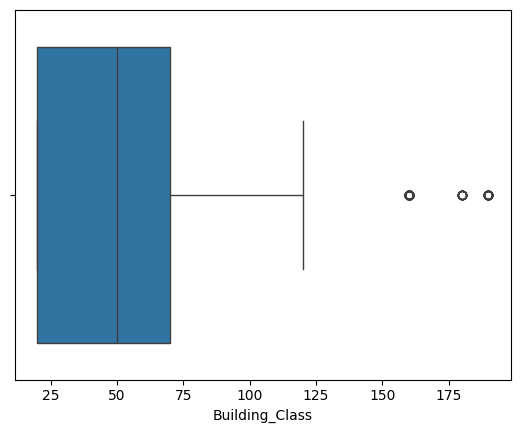

In [48]:
sns.boxplot(x=df["Building_Class"])

<Axes: xlabel='Overall_Material'>

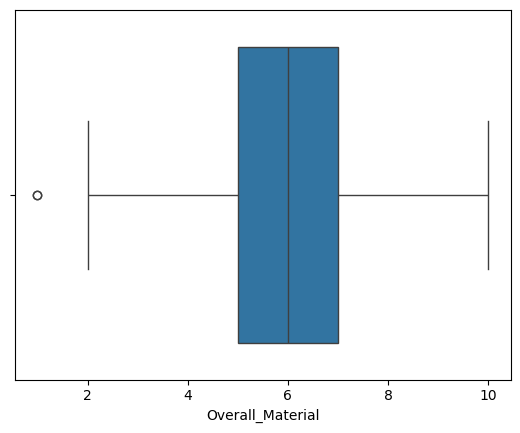

In [49]:
sns.boxplot(x=df["Overall_Material"])

In [50]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [51]:
IQR

Building_Class                  50.000000
Lot_Size                      4054.000000
Overall_Material                 2.000000
House_Condition                  1.000000
Construction_Year               46.000000
Remodel_Year                    37.000000
BsmtFinSF1                     712.000000
BsmtFinSF2                       0.000000
BsmtUnfSF                      584.500000
Total_Basement_Area            503.000000
First_Floor_Area               509.500000
Second_Floor_Area              728.000000
LowQualFinSF                     0.000000
Grade_Living_Area              648.500000
Underground_Full_Bathroom        1.000000
Underground_Half_Bathroom        0.000000
Full_Bathroom_Above_Grade        1.000000
Half_Bathroom_Above_Grade        1.000000
Bedroom_Above_Grade              1.000000
Kitchen_Above_Grade              0.000000
Rooms_Above_Grade                2.000000
Fireplaces                       1.000000
Garage_Size                      1.000000
Three_Season_Lobby_Area          0

In [52]:
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [53]:
outliers

0        True
1        True
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456     True
1457     True
1458     True
Length: 1459, dtype: bool

In [54]:
df[~outliers]

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000
6,20,RLD,10084,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,-7.064622,0,0,0,0,8,2007,WD,Normal,307000
10,20,RLD,11200,Paved,Reg,Lvl,AllPub,I,GS,Sawyer,...,30.478397,0,0,0,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,50,RLD,11767,Paved,Reg,Lvl,AllPub,I,GS,Edwards,...,6.470105,0,0,0,0,5,2007,WD,Normal,112000
1451,20,RLD,9262,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,-20.252731,0,0,0,0,5,2009,New,Partial,287090
1453,20,RLD,17217,Paved,Reg,Lvl,AllPub,I,GS,Mitchel,...,99.422640,0,0,0,0,7,2006,WD,Abnorml,84500
1454,20,FVR,7500,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,126.676547,0,0,0,0,10,2009,WD,Normal,185000


In [55]:
z_scores = np.abs(stats.zscore(df[num_cols]))

In [56]:
threshold = 3
outliers = np.where(z_scores > threshold)

In [57]:
df_cleaned = df[(z_scores < threshold).all(axis=1)]

In [58]:
df_cleaned.shape

(1073, 73)

In [59]:
df_cleaned

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000
6,20,RLD,10084,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,-7.064622,0,0,0,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RMD,3675,Paved,Reg,Lvl,AllPub,I,GS,Edwards,...,-4.014572,0,0,0,0,5,2006,WD,Normal,145000
1453,20,RLD,17217,Paved,Reg,Lvl,AllPub,I,GS,Mitchel,...,99.422640,0,0,0,0,7,2006,WD,Abnorml,84500
1454,20,FVR,7500,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,126.676547,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RLD,7917,Paved,Reg,Lvl,AllPub,I,GS,Gilbert,...,125.521880,0,0,0,0,8,2007,WD,Normal,175000


<Axes: ylabel='Building_Class'>

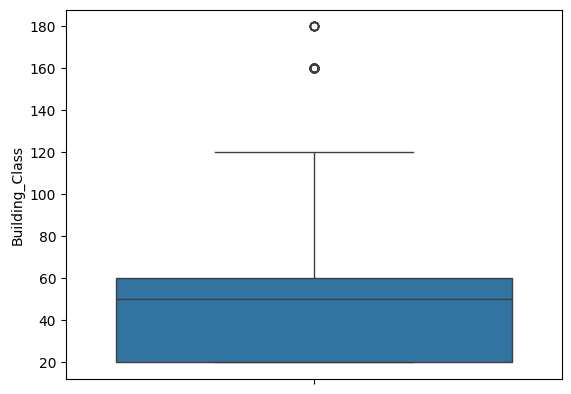

In [60]:
sns.boxplot(df_cleaned["Building_Class"])

In [61]:
num_col_df = df[num_cols]

In [62]:
df.shape

(1459, 73)

<Axes: >

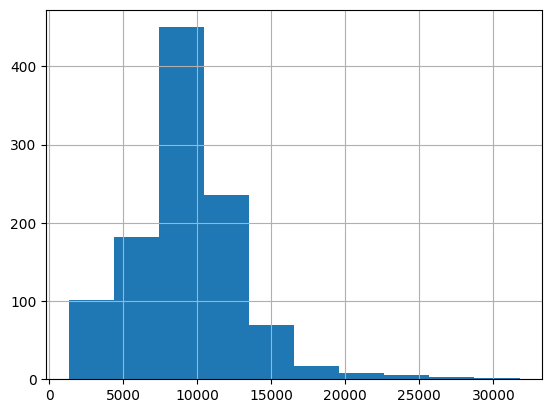

In [63]:
df_cleaned["Lot_Size"].hist()

In [64]:
outliers

(array([   1,    5,    8,    9,    9,   17,   24,   26,   33,   37,   37,
          39,   41,   46,   48,   48,   50,   51,   52,   53,   53,   53,
          55,   58,   58,   70,   70,   72,   74,   78,   80,   88,   88,
          93,   93,   93,  102,  104,  105,  113,  115,  116,  116,  118,
         120,  121,  125,  125,  129,  129,  136,  137,  137,  144,  144,
         153,  159,  161,  165,  165,  166,  166,  169,  170,  176,  176,
         178,  178,  178,  182,  185,  185,  185,  185,  185,  185,  187,
         188,  188,  188,  189,  189,  191,  196,  197,  197,  197,  197,
         197,  198,  201,  205,  213,  215,  218,  218,  224,  224,  224,
         224,  233,  237,  241,  245,  246,  246,  249,  249,  250,  251,
         253,  253,  258,  260,  263,  263,  267,  271,  273,  278,  280,
         289,  291,  291,  297,  297,  298,  298,  299,  300,  304,  304,
         304,  304,  309,  312,  312,  313,  313,  313,  314,  322,  326,
         330,  330,  330,  332,  335, 

In [65]:
lower_percentile = 0.025
upper_percentile = 0.975

# Calculate the percentile values for each column
lower_bounds = num_col_df.quantile(lower_percentile)
upper_bounds = num_col_df.quantile(upper_percentile)

In [66]:
df_capped = num_col_df.copy()
df_capped = df_capped.clip(lower=lower_bounds, upper=upper_bounds, axis=1)

print("Original DataFrame:\n", num_col_df)
print("Capped DataFrame:\n", df_capped)

Original DataFrame:
       Building_Class  Lot_Size  Overall_Material  House_Condition  \
0                 60      8450                 7                5   
1                 20      9600                 6                8   
2                 60     11250                 7                5   
3                 70      9550                 7                5   
4                 60     14260                 8                5   
...              ...       ...               ...              ...   
1454              20      7500                 7                5   
1455              60      7917                 6                5   
1456              20     13175                 6                6   
1457              70      9042                 7                9   
1458              20      9717                 5                6   

      Construction_Year  Remodel_Year  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0                  2003          2003         706           0        150  

In [67]:
df_capped.shape

(1459, 35)

<Axes: >

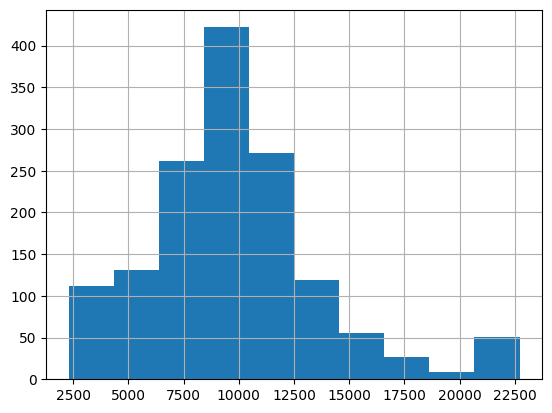

In [68]:
df_capped["Lot_Size"].hist()

<Axes: >

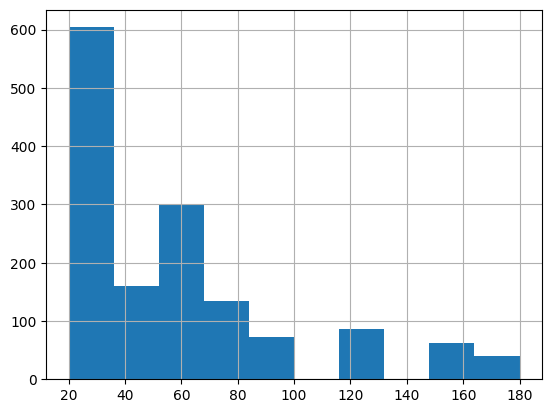

In [69]:
df_capped["Building_Class"].hist()

<Axes: >

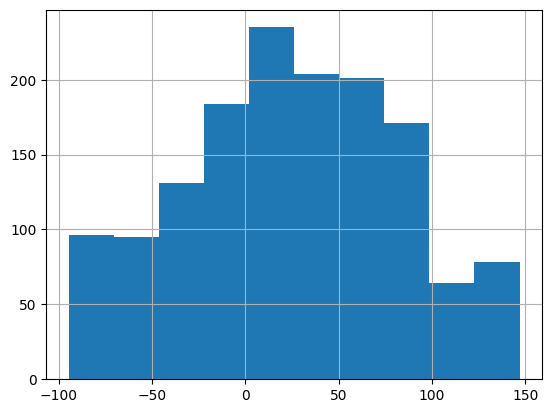

In [70]:
df_capped["Enclosed_Lobby_Area"].hist()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Size                   1459 non-null   int64  
 3   Road_Type                  1459 non-null   object 
 4   Property_Shape             1459 non-null   object 
 5   Land_Outline               1459 non-null   object 
 6   Utility_Type               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  Condition2                 1459 non-null   object 
 12  House_Type                 1459 non-null   object 
 13  House_Design               1459 non-null   objec

In [72]:
df_new = df.copy()

In [73]:
df_new.update(df_capped)

In [74]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Size                   1459 non-null   float64
 3   Road_Type                  1459 non-null   object 
 4   Property_Shape             1459 non-null   object 
 5   Land_Outline               1459 non-null   object 
 6   Utility_Type               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  Condition2                 1459 non-null   object 
 12  House_Type                 1459 non-null   object 
 13  House_Design               1459 non-null   objec

In [75]:
z_scores_capped = np.abs(stats.zscore(df_new.select_dtypes(include=[np.number])))

In [76]:
threshold = 3

# Identify outliers in the capped data
outliers_capped = z_scores_capped > threshold
#print("Outliers in capped data:\n", outliers_capped)

# Count the number of outliers in the capped data
num_outliers_capped = np.sum(outliers_capped)
print(num_outliers_capped)

Building_Class                0
Lot_Size                     38
Overall_Material              0
House_Condition               0
Construction_Year             0
Remodel_Year                  0
Brick_Veneer_Area            46
BsmtFinSF1                    0
BsmtFinSF2                   70
BsmtUnfSF                     0
Total_Basement_Area           0
First_Floor_Area              0
Second_Floor_Area             0
LowQualFinSF                  0
Grade_Living_Area             0
Underground_Full_Bathroom     0
Underground_Half_Bathroom    82
Full_Bathroom_Above_Grade     0
Half_Bathroom_Above_Grade     0
Bedroom_Above_Grade           0
Kitchen_Above_Grade          67
Rooms_Above_Grade             0
Fireplaces                    0
Garage_Built_Year             1
Garage_Size                   0
Garage_Area                   0
W_Deck_Area                   0
Open_Lobby_Area               0
Enclosed_Lobby_Area           0
Three_Season_Lobby_Area       0
Screen_Lobby_Area            80
Pool_Are

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: >

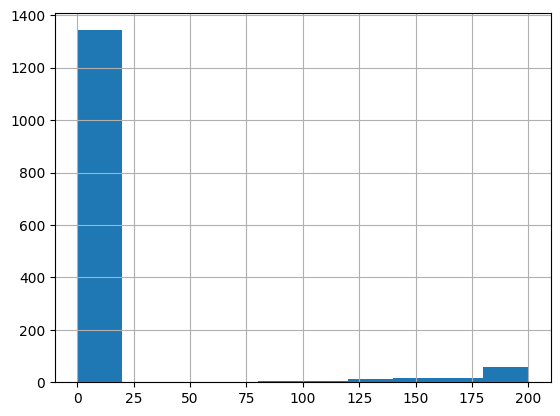

In [77]:
df_new["Screen_Lobby_Area"].hist()

In [78]:
columns_to_scale = ['Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF2', "Underground_Half_Bathroom", "Kitchen_Above_Grade", 
                   "Screen_Lobby_Area", "Miscellaneous_Value"]

In [79]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Apply the scaler to the selected columns
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])

In [80]:
df_new

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,-0.253330,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RLD,0.030340,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,15.039392,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RLD,0.437346,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RLD,0.018007,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RLD,1.179822,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0.0,0,0.0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,-0.487667,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,126.676547,0,0.0,0,0.0,10,2009,WD,Normal,185000.0
1455,60,RLD,-0.384805,Paved,Reg,Lvl,AllPub,I,GS,Gilbert,...,125.521880,0,0.0,0,0.0,8,2007,WD,Normal,175000.0
1456,20,RLD,0.912185,Paved,Reg,Lvl,AllPub,I,GS,NWAmes,...,146.868340,0,0.0,0,0.0,2,2010,WD,Normal,210000.0
1457,70,RLD,-0.107301,Paved,Reg,Lvl,AllPub,I,GS,Crawfor,...,54.320896,0,0.0,0,450.0,5,2010,WD,Normal,266500.0


<Axes: >

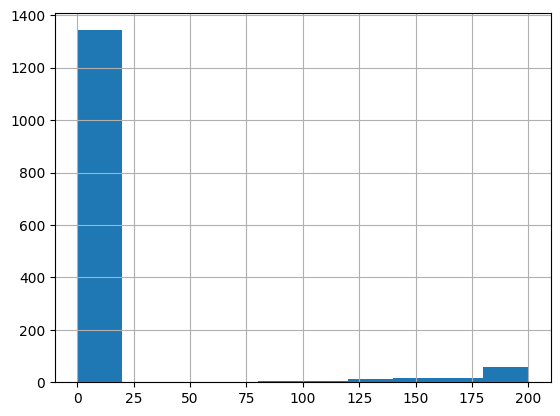

In [81]:
df_new["Screen_Lobby_Area"].hist()

In [82]:
lower_percentile = 0.025
upper_percentile = 0.975

# Calculate the percentile values for each column
lower_bounds = df_new[num_cols].quantile(lower_percentile)
upper_bounds = df_new[num_cols].quantile(upper_percentile)

In [83]:
df_capped = df_new[num_cols].copy()
df_capped = df_capped.clip(lower=lower_bounds, upper=upper_bounds, axis=1)

print("Original DataFrame:\n", df_new[num_cols])
print("Capped DataFrame:\n", df_capped)

Original DataFrame:
       Building_Class  Lot_Size  Overall_Material  House_Condition  \
0                 60 -0.253330                 7                5   
1                 20  0.030340                 6                8   
2                 60  0.437346                 7                5   
3                 70  0.018007                 7                5   
4                 60  1.179822                 8                5   
...              ...       ...               ...              ...   
1454              20 -0.487667                 7                5   
1455              60 -0.384805                 6                5   
1456              20  0.912185                 6                6   
1457              70 -0.107301                 7                8   
1458              20  0.059201                 5                6   

      Construction_Year  Remodel_Year  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0                  2003          2003       706.0         0.0        150  

In [84]:
z_scores_capped = np.abs(stats.zscore(df_new.select_dtypes(include=[np.number])))

In [85]:
threshold = 3

# Identify outliers in the capped data
outliers_capped = z_scores_capped > threshold
#print("Outliers in capped data:\n", outliers_capped)

# Count the number of outliers in the capped data
num_outliers_capped = np.sum(outliers_capped)
print(num_outliers_capped)

Building_Class                0
Lot_Size                     38
Overall_Material              0
House_Condition               0
Construction_Year             0
Remodel_Year                  0
Brick_Veneer_Area            46
BsmtFinSF1                    0
BsmtFinSF2                   70
BsmtUnfSF                     0
Total_Basement_Area           0
First_Floor_Area              0
Second_Floor_Area             0
LowQualFinSF                  0
Grade_Living_Area             0
Underground_Full_Bathroom     0
Underground_Half_Bathroom    82
Full_Bathroom_Above_Grade     0
Half_Bathroom_Above_Grade     0
Bedroom_Above_Grade           0
Kitchen_Above_Grade          67
Rooms_Above_Grade             0
Fireplaces                    0
Garage_Built_Year             1
Garage_Size                   0
Garage_Area                   0
W_Deck_Area                   0
Open_Lobby_Area               0
Enclosed_Lobby_Area           0
Three_Season_Lobby_Area       0
Screen_Lobby_Area            80
Pool_Are

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Size                   1459 non-null   float64
 3   Road_Type                  1459 non-null   object 
 4   Property_Shape             1459 non-null   object 
 5   Land_Outline               1459 non-null   object 
 6   Utility_Type               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  Condition2                 1459 non-null   object 
 12  House_Type                 1459 non-null   object 
 13  House_Design               1459 non-null   objec

<Axes: >

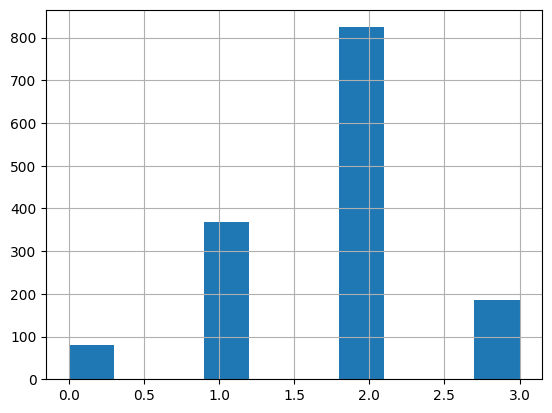

In [87]:
df_new["Garage_Size"].hist()

In [88]:
df_new["Garage_Size"].unique()

array([2, 3, 1, 0], dtype=int64)

In [89]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [90]:
cat_col_df = df_new[categorical_columns]

In [91]:
categorical_columns.shape

(37,)

In [92]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [93]:
numerical_columns = ['Building_Class', 'Lot_Size', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Above_Grade', 'Rooms_Above_Grade',
       'Fireplaces', 'Garage_Built_Year', 'Garage_Size', 'Garage_Area',
       'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Month_Sold', 'Year_Sold']

In [94]:
num_col_df = df_new[numerical_columns]

In [95]:
num_col_df.head()

,Building_Class,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,60,-0.253330,7,5,2003,2003,1.191489,706.0,0.0,150,...,874.475048,163.788080,69.596115,20.337934,0,0.0,0,0.0,2,2008
1,20,0.030340,6,8,1976,1976,0.000000,978.0,0.0,284,...,196.316304,198.900074,74.716033,15.039392,0,0.0,0,0.0,5,2007
2,60,0.437346,7,5,2001,2002,0.984802,486.0,0.0,434,...,218.068403,26.127533,32.085268,-46.232198,0,0.0,0,0.0,9,2008
3,70,0.018007,7,5,1915,1970,0.000000,216.0,0.0,540,...,696.996439,46.948018,40.181415,60.921821,0,0.0,0,0.0,2,2006
4,60,1.179822,8,5,2000,2000,2.127660,655.0,0.0,490,...,568.859882,-10.626105,20.755323,21.788818,0,0.0,0,0.0,12,2008


In [96]:
df.head()

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [97]:
df.shape

(1459, 73)

In [98]:
df_new.duplicated().sum()

0

In [99]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [100]:
X

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FVR,7500,Paved,Reg,Lvl,AllPub,I,GS,Somerst,...,-9.267967,126.676547,0,0,0,0,10,2009,WD,Normal
1455,60,RLD,7917,Paved,Reg,Lvl,AllPub,I,GS,Gilbert,...,113.043436,125.521880,0,0,0,0,8,2007,WD,Normal
1456,20,RLD,13175,Paved,Reg,Lvl,AllPub,I,GS,NWAmes,...,221.514480,148.266666,0,0,0,0,2,2010,WD,Normal
1457,70,RLD,9042,Paved,Reg,Lvl,AllPub,I,GS,Crawfor,...,110.888690,54.320896,0,0,0,2500,5,2010,WD,Normal


In [101]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [102]:
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
    ])  # keep the other columns as is

df_encoded = preprocessor.fit_transform(X)

In [103]:
encoded_feature_names1 = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
encoded_feature_names2 = preprocessor.named_transformers_['num'].get_feature_names_out()
all_feature_names = list(encoded_feature_names1) + list(encoded_feature_names2)


In [104]:
len(all_feature_names)

266

In [105]:
df_encoded.shape

(1459, 266)

In [106]:
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)

In [107]:
len(all_feature_names)

266

In [108]:
#len(encoded_feature_names)

In [109]:
df_encoded

,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,0.072771,-0.207111,0.650852,-0.516787,1.050507,0.877986,0.510905,0.575950,-0.287744,-0.945245,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.873090,-0.091895,-0.072372,2.179252,0.156540,-0.430226,-0.574674,1.172460,-0.287744,-0.641887,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.072771,0.073415,0.650852,-0.516787,0.984287,0.829534,0.322590,0.093479,-0.287744,-0.302307,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309236,-0.096904,0.650852,-0.516787,-1.863163,-0.720940,-0.574674,-0.498645,-0.287744,-0.062338,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.072771,0.374980,1.374077,-0.516787,0.951177,0.732629,1.363861,0.464105,-0.287744,-0.175531,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.873090,-0.302289,0.650852,-0.516787,1.083617,0.974891,-0.574674,-0.073193,-0.287744,0.551169,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.072771,-0.260511,-0.072372,-0.516787,0.918068,0.732629,-0.574674,-0.972344,-0.287744,0.872638,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.873090,0.266277,-0.072372,0.381893,0.222760,0.151202,0.084428,0.760166,0.723464,0.048592,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309236,-0.147800,0.650852,3.077931,-1.002306,1.023343,-0.574674,-0.369255,-0.287744,0.700585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
numerical_cols
len(numerical_cols)

34

In [111]:
#len(encoded_feature_names)

In [112]:
aaa = preprocessor.named_transformers_['num']["scaler"].get_feature_names_out()
aaa
len(aaa)

34

In [113]:
df_encoded.select_dtypes(include=['float64', 'int64']).columns

Index(['Zoning_Class_Commer', 'Zoning_Class_FVR', 'Zoning_Class_RHD',
       'Zoning_Class_RLD', 'Zoning_Class_RMD', 'Road_Type_Gravel',
       'Road_Type_Paved', 'Property_Shape_IR1', 'Property_Shape_IR2',
       'Property_Shape_IR3',
       ...
       'Garage_Area', 'W_Deck_Area', 'Open_Lobby_Area', 'Enclosed_Lobby_Area',
       'Three_Season_Lobby_Area', 'Screen_Lobby_Area', 'Pool_Area',
       'Miscellaneous_Value', 'Month_Sold', 'Year_Sold'],
      dtype='object', length=266)

In [114]:
df_encoded["Building_Class"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    0.0
1458    0.0
Name: Building_Class, Length: 1459, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [119]:
print("R2 score: ", r2)
print("MSE: ", mse)

R2 score:  -6.61325762871679e+17
MSE:  3.477691426205474e+27


In [120]:
from sklearn.feature_selection import f_classif
import statsmodels.api as sm

# >>>>>>>>>>>>>>>

In [121]:
columns_to_scale = ['Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF2', "Underground_Half_Bathroom", "Kitchen_Above_Grade", 
                   "Screen_Lobby_Area", "Miscellaneous_Value"]

In [122]:
new_drop_cols = ["Month_Sold", "Year_Sold"]

In [123]:
df_new = df_new.drop(new_drop_cols, axis=1)

In [124]:
df_new.shape

(1459, 71)

In [125]:
X = df_new.iloc[:,0:-1]
y = df_new.iloc[:,-1]

In [126]:
X.shape

(1459, 70)

In [127]:
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[('num', Pipeline(steps=[('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
    ])  # keep the other columns as is

df_encoded = preprocessor.fit_transform(X)

In [128]:
encoded_feature_names1 = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
encoded_feature_names2 = preprocessor.named_transformers_['num'].get_feature_names_out()
all_feature_names = list(encoded_feature_names1) + list(encoded_feature_names2)

In [129]:
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

model = LinearRegression()
xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

model.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [132]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
y_pred2 = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred2)

r2 = r2_score(y_test, y_pred)
r22 = r2_score(y_test, y_pred2)

print("R2 score: ", r2)
print("MSE: ", mse)

print("R2 score: ", r22)
print("MSE: ", mse2)

R2 score:  -4964661482807250.0
MSE:  2.3978643961429037e+25
R2 score:  0.8990251398895792
MSE:  487694927.0413902


In [133]:
df_encoded

,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,...,Fireplaces,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value
0,0.078803,-0.342461,0.682560,-0.577193,1.069716,0.880330,0.625552,0.640018,-0.309973,-0.963448,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.881313,-0.058422,-0.084072,2.377630,0.149965,-0.429640,-0.627895,1.283871,-0.309973,-0.650766,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.078803,0.349113,0.682560,-0.577193,1.001586,0.831812,0.408117,0.119255,-0.309973,-0.300749,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.318832,-0.070772,0.682560,-0.577193,-1.927992,-0.720744,-0.627895,-0.519863,-0.309973,-0.053404,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.078803,1.092554,1.449192,-0.577193,0.967522,0.734778,1.610404,0.519296,-0.309973,-0.170076,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.881313,-0.577102,0.682560,-0.577193,1.103781,0.977364,-0.627895,-0.060645,-0.309973,0.578960,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.078803,-0.474107,-0.084072,-0.577193,0.933457,0.734778,-0.627895,-1.031158,-0.309973,0.910310,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.881313,0.824570,-0.084072,0.407748,0.218095,0.152569,0.133126,0.838855,0.933506,0.060935,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.318832,-0.196243,0.682560,2.377630,-1.042305,1.025882,-0.627895,-0.380204,-0.309973,0.732968,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


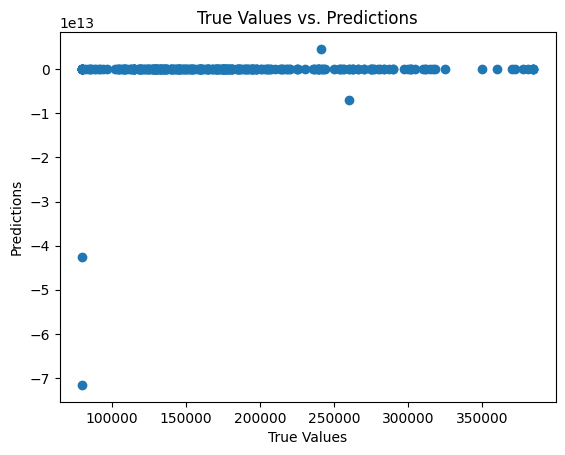

In [134]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

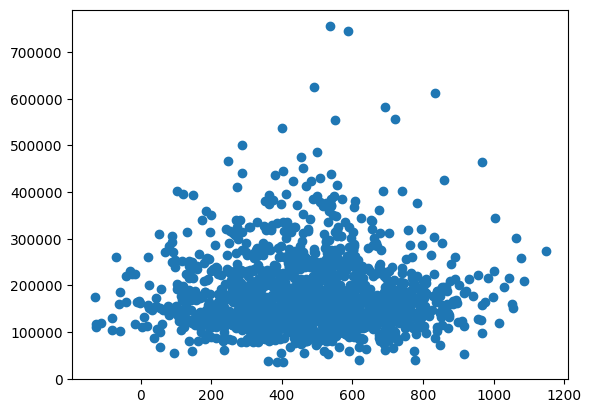

In [135]:
plt.scatter(df["Garage_Area"], df["Sale_Price"])
#plt.plot(df["Sale_Price"])

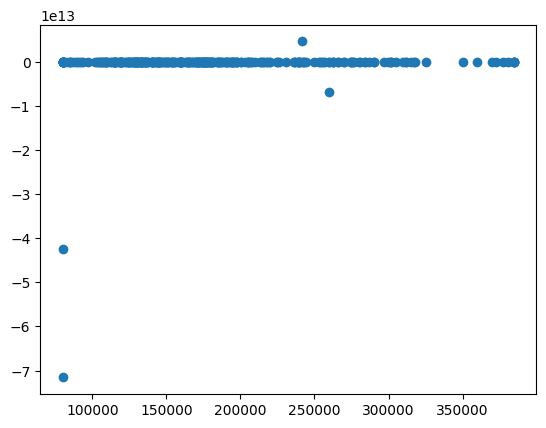

In [136]:
plt.scatter(y_test, y_pred)

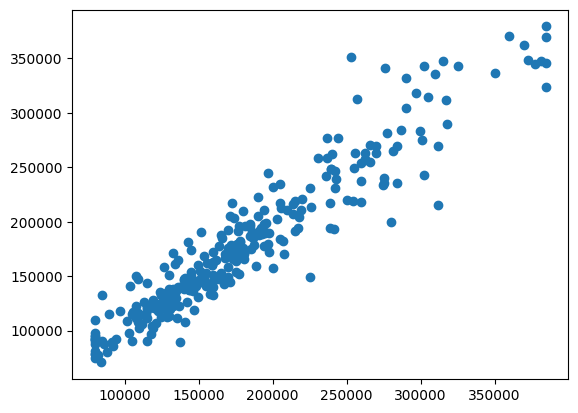

In [137]:
plt.scatter(y_test, y_pred2)

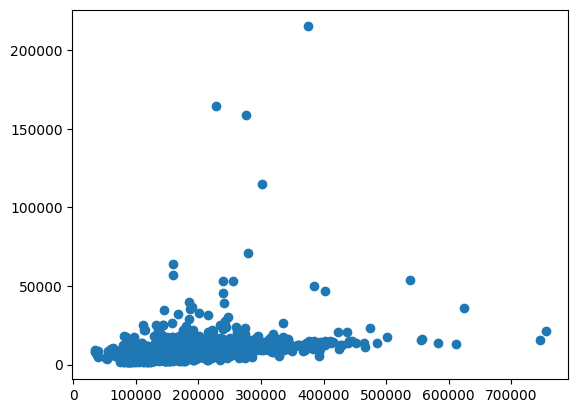

In [138]:
plt.scatter(df["Sale_Price"], df["Lot_Size"])

In [139]:
df.head()

,Building_Class,Zoning_Class,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'k-NN': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]:.4f}, R²: {metrics["R²"]:.4f}')


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.946e+08, tolerance: 5.860e+08
  model = cd_fast.enet_coordinate_descent(


Decision Tree - MSE: 1345934603.1036, R²: 0.7213
Random Forest - MSE: 494365982.4753, R²: 0.8976
Gradient Boosting - MSE: 412193889.1403, R²: 0.9147
SVR - MSE: 5138731078.6076, R²: -0.0639
k-NN - MSE: 819980808.3466, R²: 0.8302
Ridge - MSE: 508563527.9830, R²: 0.8947
Lasso - MSE: 551902421.7442, R²: 0.8857
ElasticNet - MSE: 524812800.8725, R²: 0.8913
Neural Network - MSE: 6106411577.4977, R²: -0.2643


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
